# General visualization of 1000 crime incidents

In [1]:
from arcgis.gis import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
philly_2006 = pd.read_csv(r'E:\GIS_Data\Analytics\PhillyCrime\crime_combined.csv')

In [3]:
philly_2006.head()

,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,Text_General_Code,Police_Districts,Month,Lon,Lat
0,18,3,2009-10-02 14:24:00,2009-10-02,14:24:00,14,200918067518,S 38TH ST / MARKETUT ST,800.0,Other Assaults,NaN,2009-10,NaN,NaN
1,14,1,2009-05-10 00:55:00,2009-05-10,00:55:00,0,200914033994,8500 BLOCK MITCH,2600.0,All Other Offenses,NaN,2009-05,NaN,NaN
2,25,J,2009-08-07 15:40:00,2009-08-07,15:40:00,15,200925083199,6TH CAMBRIA,800.0,Other Assaults,NaN,2009-08,NaN,NaN
3,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,Weapon Violations,20.0,2009-07,-75.130477,40.036389
4,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,All Other Offenses,8.0,2009-06,-75.166350,39.969532


In [4]:
philly_2006.shape

(2219929, 14)

## Which crime is most likely to occur?

In [5]:
philly_2006.Text_General_Code.value_counts()

All Other Offenses                         434502
Other Assaults                             274763
Thefts                                     255653
Vandalism/Criminal Mischief                198834
Theft from Vehicle                         169883
Narcotic / Drug Law Violations             136370
Fraud                                      113064
Recovered Stolen Motor Vehicle              94461
Burglary Residential                        93679
Aggravated Assault No Firearm               68416
DRIVING UNDER THE INFLUENCE                 53253
Robbery No Firearm                          51546
Motor Vehicle Theft                         46340
Robbery Firearm                             40321
Disorderly Conduct                          40001
Aggravated Assault Firearm                  27706
Burglary Non-Residential                    23115
Weapon Violations                           18873
Other Sex Offenses (Not Commercialized)     15190
Prostitution and Commercialized Vice        12754


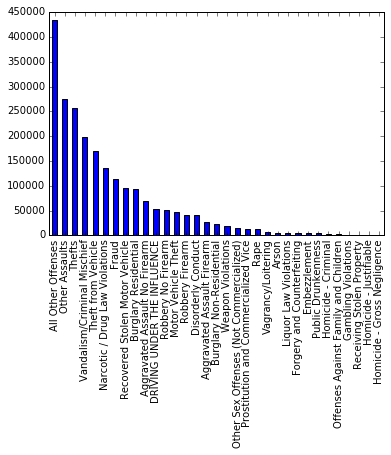

In [7]:
philly_2006.Text_General_Code.value_counts().plot(kind='bar')

### Slice time and create the following columns
Year, Month, Day, Day_of_week, Hour

In [6]:
philly_2006['Hour'] = [pd.to_datetime(f).hour for f in philly_2006.Dispatch_Date_Time]

In [7]:
philly_2006['year'] = [pd.to_datetime(f).date().year for f in philly_2006.Dispatch_Date_Time]

In [8]:
philly_2006['month'] = [pd.to_datetime(f).date().month for f in philly_2006.Dispatch_Date_Time]

In [9]:
philly_2006['day_of_month'] = \
[pd.to_datetime(f).date().day for f in philly_2006.Dispatch_Date_Time]

In [10]:
philly_2006['day_of_week'] = \
[pd.to_datetime(f).weekday_name for f in philly_2006.Dispatch_Date_Time]

Let us save this dataset into a csv file for future use.

In [11]:
philly_2006.to_csv(r'E:\GIS_Data\Analytics\PhillyCrime\crime_combined_temporal.csv')

## Get a subset of 100k rows


In [12]:
random_index = np.random.permutation(len(philly_2006))[:100000]

In [13]:
philly_random_subset = philly_2006.take(random_index)

In [14]:
philly_random_subset.shape

(100000, 18)

In [15]:
philly_random_subset.to_csv(r'E:\GIS_Data\Analytics\PhillyCrime\crime_rnd_100k.csv')

### Set aside 30% of this for test and remaining 70% for train

In [16]:
test_rnd_index = np.random.permutation(len(philly_random_subset))[:30000]
philly_test_subset = philly_random_subset.take(test_rnd_index)
philly_test_subset.shape

(30000, 18)

In [17]:
philly_test_subset.to_csv(r'E:\GIS_Data\Analytics\PhillyCrime\crime_test_30k.csv')

In [18]:
train_rnd_index = np.random.permutation(len(philly_random_subset))[:70000]
philly_train_subset = philly_random_subset.take(train_rnd_index)
philly_train_subset.shape

(70000, 18)

In [19]:
philly_train_subset.to_csv(r'E:\GIS_Data\Analytics\PhillyCrime\crime_train_70k.csv')